# 8.1 Illustrating How Kernel Regression for 2D Data Leads to a Linear Relation in 3D Space

When using kernel regression with a nonlinear kernel, we transform the original input space into a higher dimensional space where the data may exhibit a linear relationship to the y values.

Here, we illustrate this for a 2D dataset $(x_i, y_i)$ by projecting it into a higher-dimensional space where the relationship becomes linear.

In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Step 1: Generate Nonlinear 2D Data

We create data where $y = x_1^2 + x_2^2$, which is clearly **not linear** in 2D.

In [2]:
# Generate 2D data

x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(-2, 2, 20)

X1, X2 = np.meshgrid(x1, x2)

Y = X1**2 + X2**2  # Nonlinear relation in 2D"

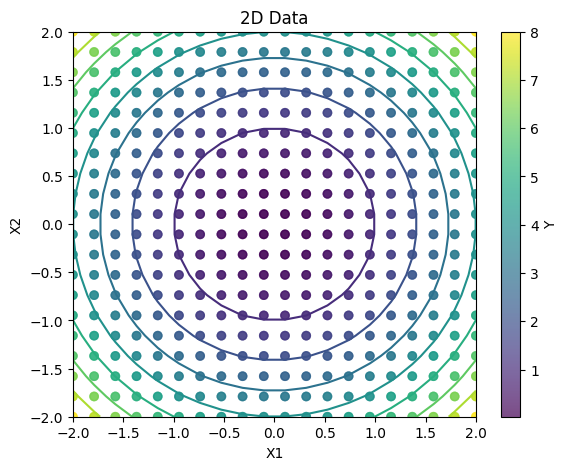

In [9]:
# Plot the original data in 2D
fig = plt.figure(figsize=(6.5, 5))
ax = fig.add_subplot(111)
ax.contour(X1, X2, Y)
ax.scatter(X1, X2, c=Y, cmap='viridis', marker='o', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('2D Data')

# Add color bar
cbar = plt.colorbar(ax.scatter(X1, X2, c=Y, cmap='viridis', marker='o', alpha=0.7))
cbar.set_label('Y')



## Step 2: Transform the Data to 3D

We transformed the 2D input space $(x_1, x_2)$ into a higher-dimensional 3D space using the feature mapping:
$$
\Phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} \,x_1 x_2)
$$

Now, the equation $ y = x_1^2 + x_2^2 $ becomes **linear** in the new space.

Instead of explicitly computing this transformation, we can use a kernel function to compute the dot product in the higher-dimensional space without explicitly mapping the data.

## Kernel Function for Feature Mapping

### Step 1: Compute the Inner Product in the 3D Space
If we take two input points $ (x_1, x_2) $ and $ (x_1', x_2') $, their transformation in **3D space** is:

$$
\Phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2)
$$

$$
\Phi(x_1', x_2') = (x_1'^2, x_2'^2, \sqrt{2} x_1' x_2')
$$

Now, we compute their **dot product** in the 3D space:

$$
\Phi(x_1, x_2) \cdot \Phi(x_1', x_2') =
x_1^2 x_1'^2 + x_2^2 x_2'^2 + 2 x_1 x_2 x_1' x_2'.
$$

---

### Step 2: Recognizing the Kernel Function
Notice that this is just the **square of the inner product** of the original vectors:

$$
(x_1 x_1' + x_2 x_2')^2.
$$

This matches the **quadratic polynomial kernel**:

$$
K(x, x') = (x^T x')^2.
$$

---

### Step 3: Interpretation
- Instead of explicitly mapping the data to 3D, we can **use this kernel function directly** in kernel ridge regression.
- The kernel computes the similarity between data points **as if they were transformed into a higher-dimensional space**.
- This **saves computational cost** and enables **nonlinear regression using linear methods in a higher-dimensional space**.


In [4]:
# Transform data into 3D space

Z1 = X1**2
Z2 = X2**2
Z3 = np.sqrt(2) * X1 * X2  # Interaction term"

## Step 3: Plot the Transformed Data in 3D

We visualize the transformed data and fit a linear plane to confirm the relationship.

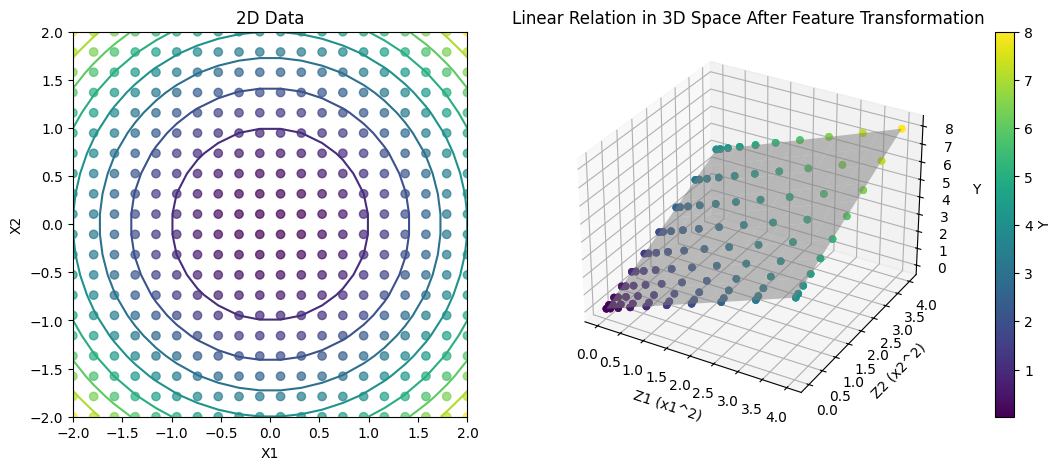

In [ ]:
# Create plot for origina and transformed data
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Plot the original data in 2D
ax1.contour(X1, X2, Y)
ax1.scatter(X1, X2, c=Y, cmap='viridis', marker='o', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('2D Data')

# Plot the transformed data in 3D
ax2.scatter(Z1, Z2, Y, c=Y, cmap='viridis', marker='o', alpha=0.7)

# Fit a linear plane (Z1 + Z2) in 3D space
Z1_flat = Z1.flatten()
Z2_flat = Z2.flatten()
Y_flat = Y.flatten()

# Compute the best-fit plane using least squares
A = np.c_[Z1_flat, Z2_flat, np.ones_like(Z1_flat)]
coeffs, _, _, _ = np.linalg.lstsq(A, Y_flat, rcond=None)

Z1_range = np.linspace(Z1.min(), Z1.max(), 10)
Z2_range = np.linspace(Z2.min(), Z2.max(), 10)
Z1_grid, Z2_grid = np.meshgrid(Z1_range, Z2_range)

Y_plane = coeffs[0] * Z1_grid + coeffs[1] * Z2_grid + coeffs[2]

# Plot the plane
ax2.plot_surface(Z1_grid, Z2_grid, Y_plane, alpha=0.5, color='gray')

# Labels and title
ax2.set_xlabel('Z1 (x1^2)')
ax2.set_ylabel('Z2 (x2^2)')
ax2.set_zlabel('Y')
ax2.set_title('Linear Relation in 3D Space After Feature Transformation')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(Y)
cbar = plt.colorbar(sm, ax=[ax1, ax2], orientation='vertical')
cbar.set_label('Y')

# Show the plot
plt.show()